In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv('/home/jaeyoon89/jaeyoon_study/train_bike.csv')
test = pd.read_csv('/home/jaeyoon89/jaeyoon_study/test_test.csv')

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### test에 있는 casual, registered,count 값 nan으로 바꾸기

In [21]:
test['casual'] = np.nan
test['registered'] = np.nan
test['count'] = np.nan

In [22]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,DOW,hour,casual,registered,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0,NaN,NaN,NaN
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1,NaN,NaN,NaN
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2,NaN,NaN,NaN
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3,NaN,NaN,NaN
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4,NaN,NaN,NaN


In [23]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  DOW         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [24]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [25]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['DOW'] = train['datetime'].dt.dayofweek
train['hour'] = train['datetime'].dt.hour

In [26]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,DOW,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [27]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['DOW'] = test['datetime'].dt.dayofweek
test['hour'] = test['datetime'].dt.hour

In [28]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,DOW,hour,casual,registered,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0,NaN,NaN,NaN
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1,NaN,NaN,NaN
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2,NaN,NaN,NaN
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3,NaN,NaN,NaN
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4,NaN,NaN,NaN


In [29]:
col = ['workingday','temp','year','month','DOW', 'hour']
x = train[col]
y = train['count']

In [30]:
X_test = test[col]
Y_test = test['count']

In [31]:
from sklearn.model_selection import train_test_split
X_train , X_valid ,Y_train , Y_valid = train_test_split(x,y,test_size = 0.25, random_state = 201)

### RSMLE 함수 만들기

In [32]:
def RSMLE(predictions , realizations):
    predictions_use = predictions.clip(0)
    rmsle = np.sqrt(np.mean(np.array(np.log(predictions_use+1)-np.log(realizations+1))**2))
    return rmsle

### DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(min_samples_split=25 , random_state=201)
dt_model = dt.fit(X_train,Y_train)

In [36]:
dt_pred = dt_model.predict(X_valid)

In [37]:
pd.DataFrame(dt_model.feature_importances_,index=col)

,0
workingday,0.036680
temp,0.082574
year,0.096813
month,0.070877
DOW,0.052269
hour,0.660788


Text(0, 0.5, 'y_valid')

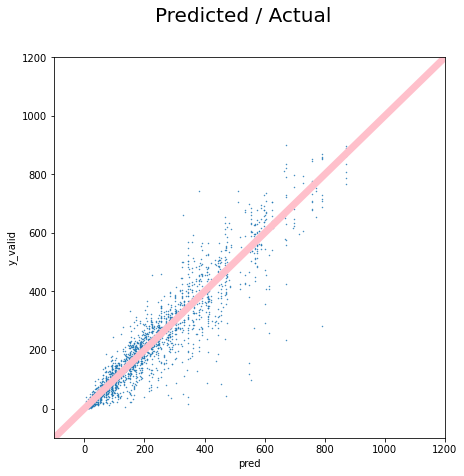

In [38]:
plt.figure(figsize=(7,7))
plt.scatter(dt_pred,Y_valid, s=0.2)
plt.xlim(-100,1200)
plt.ylim(-100,1200)
plt.plot([-100,1200],[-100,1200],color = 'pink', linestyle = '-', linewidth =7)
plt.suptitle("Predicted / Actual", fontsize = 20 )
plt.xlabel('pred')
plt.ylabel("y_valid")

In [40]:
RSMLE(dt_pred,Y_valid) # 값이 작을수록 좋은 것

0.3966703555172774

#### RandomForestRegressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, max_features=4,min_samples_leaf=5, random_state=201)
rf.fit(X_train,Y_train)

RandomForestRegressor(max_features=4, min_samples_leaf=5, n_estimators=500,
                      random_state=201)

In [42]:
predict = rf.predict(X_valid)

Text(0, 0.5, 'y_valid')

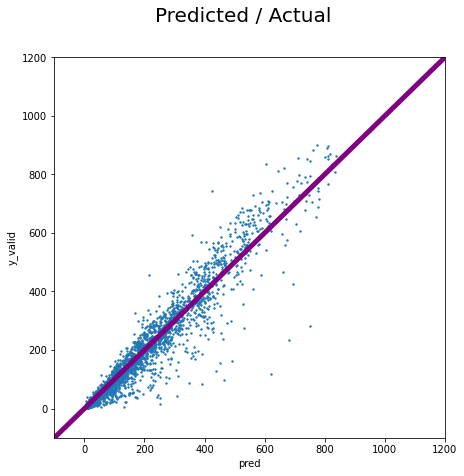

In [43]:
plt.figure(figsize=(7,7))
plt.scatter(predict,Y_valid, s=1.9)
plt.xlim(-100,1200)
plt.ylim(-100,1200)
plt.plot([-100,1200],[-100,1200],color = 'purple', linestyle = '-', linewidth =5)
plt.suptitle("Predicted / Actual", fontsize = 20 )
plt.xlabel('pred')
plt.ylabel("y_valid")

In [44]:
RSMLE(predict,Y_valid)

0.37402987325452597

### xgboost

In [45]:
import xgboost as xgb
xgb_train = xgb.DMatrix(X_train,label=Y_train)
xgb_valid = xgb.DMatrix(X_valid)

In [46]:
num_round_for_cv = 500
param = { 'max_depth': 6 , 'eta':0.1 , 'seed' : 201 , 'objective' : 'reg:linear'}

In [47]:
xgb.cv(param,xgb_train,num_round_for_cv,nfold=5,show_stdv=False,verbose_eval=True,as_pandas=False)

[19:15:09] WARNING: /tmp/pip-build-gopfpmzp/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:09] WARNING: /tmp/pip-build-gopfpmzp/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:09] WARNING: /tmp/pip-build-gopfpmzp/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:09] WARNING: /tmp/pip-build-gopfpmzp/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:09] WARNING: /tmp/pip-build-gopfpmzp/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:241.97723	test-rmse:242.02546
[1]	train-rmse:222.11101	test-rmse:

[164]	train-rmse:38.08604	test-rmse:49.03392
[165]	train-rmse:38.06504	test-rmse:49.02221
[166]	train-rmse:38.03120	test-rmse:49.02343
[167]	train-rmse:37.99911	test-rmse:49.02220
[168]	train-rmse:37.95966	test-rmse:49.01459
[169]	train-rmse:37.92178	test-rmse:49.00062
[170]	train-rmse:37.88822	test-rmse:48.98986
[171]	train-rmse:37.84269	test-rmse:48.97930
[172]	train-rmse:37.80173	test-rmse:48.97871
[173]	train-rmse:37.72135	test-rmse:48.94799
[174]	train-rmse:37.67524	test-rmse:48.93680
[175]	train-rmse:37.63636	test-rmse:48.93449
[176]	train-rmse:37.59619	test-rmse:48.93207
[177]	train-rmse:37.53969	test-rmse:48.93101
[178]	train-rmse:37.47427	test-rmse:48.90595
[179]	train-rmse:37.42588	test-rmse:48.89120
[180]	train-rmse:37.36147	test-rmse:48.87956
[181]	train-rmse:37.31322	test-rmse:48.86687
[182]	train-rmse:37.25089	test-rmse:48.84604
[183]	train-rmse:37.20062	test-rmse:48.84956
[184]	train-rmse:37.14029	test-rmse:48.84426
[185]	train-rmse:37.07682	test-rmse:48.82884
[186]	trai

[347]	train-rmse:31.26100	test-rmse:48.00158
[348]	train-rmse:31.23277	test-rmse:47.99134
[349]	train-rmse:31.21185	test-rmse:47.99237
[350]	train-rmse:31.18328	test-rmse:47.99455
[351]	train-rmse:31.15425	test-rmse:47.99240
[352]	train-rmse:31.13032	test-rmse:47.98766
[353]	train-rmse:31.11048	test-rmse:47.99008
[354]	train-rmse:31.08950	test-rmse:47.99072
[355]	train-rmse:31.06580	test-rmse:47.98453
[356]	train-rmse:31.04860	test-rmse:47.98596
[357]	train-rmse:31.00712	test-rmse:47.98294
[358]	train-rmse:30.98557	test-rmse:47.98295
[359]	train-rmse:30.94882	test-rmse:47.97327
[360]	train-rmse:30.91044	test-rmse:47.96494
[361]	train-rmse:30.88013	test-rmse:47.97339
[362]	train-rmse:30.86067	test-rmse:47.96735
[363]	train-rmse:30.82322	test-rmse:47.96803
[364]	train-rmse:30.78996	test-rmse:47.96946
[365]	train-rmse:30.75498	test-rmse:47.96510
[366]	train-rmse:30.72373	test-rmse:47.95855
[367]	train-rmse:30.69964	test-rmse:47.95806
[368]	train-rmse:30.67688	test-rmse:47.96794
[369]	trai

{'train-rmse-mean': [241.97723380000002,
  222.11101079999997,
  204.3687866,
  188.82301339999998,
  174.669867,
  162.21726359999997,
  151.3845458,
  141.92846680000002,
  132.9900056,
  124.7622224,
  117.28967600000001,
  110.42402799999999,
  104.4707994,
  98.91468040000001,
  93.9523192,
  89.4889236,
  85.479213,
  82.352318,
  79.4113938,
  76.53402279999999,
  74.1374086,
  71.842656,
  69.98553480000001,
  68.29591819999999,
  66.4696336,
  64.2676576,
  62.4159118,
  60.710301400000006,
  59.300558,
  58.417608800000004,
  57.32148600000001,
  56.2024674,
  55.481951200000005,
  54.779962999999995,
  54.2231508,
  53.6063048,
  53.05828640000001,
  52.5967218,
  52.140219,
  51.705190200000004,
  51.343107399999994,
  50.96397940000001,
  50.5411086,
  50.264920000000004,
  49.9847442,
  49.763981599999994,
  49.5590936,
  49.247208,
  49.005487800000004,
  48.764216,
  48.5634856,
  48.392624,
  48.1706872,
  47.9452538,
  47.6823258,
  47.5140638,
  47.393403,
  47.12473

In [48]:
num_round = 400
xg_model = xgb.train(param,xgb_train,num_round)
xg_pred = xg_model.predict(xgb_valid)

[19:16:07] WARNING: /tmp/pip-build-gopfpmzp/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [49]:
xg_model.get_fscore()

{'hour': 6278,
 'workingday': 1090,
 'month': 3312,
 'year': 1696,
 'DOW': 3600,
 'temp': 5497}

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

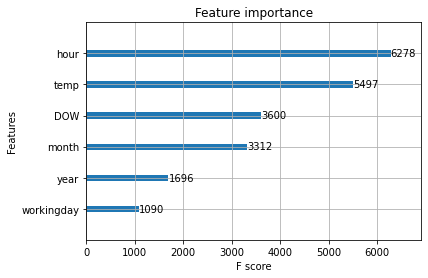

In [50]:
xgb.plot_importance(xg_model)

Text(0, 0.5, 'y_valid')

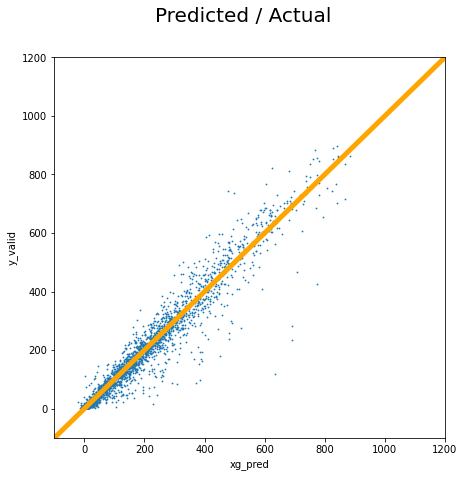

In [51]:
plt.figure(figsize=(7,7))
plt.scatter(xg_pred,Y_valid, s=0.6)
plt.xlim(-100,1200)
plt.ylim(-100,1200)
plt.plot([-100,1200],[-100,1200],color = 'orange', linestyle = '-', linewidth =5)
plt.suptitle("Predicted / Actual", fontsize = 20 )
plt.xlabel('xg_pred')
plt.ylabel("y_valid")

In [52]:
RSMLE(xg_pred,Y_valid)

0.4739488037201391

In [53]:
test_dt =  dtr.fit(x,y)
predict_dt = test_dt.predict(X_test)
dt_clipped = pd.Series(predict_dt.clip(0))

In [55]:
test_rf =  rf.fit(x,y)
predict_rt = test_rf.predict(X_test)
rf_clipped = pd.Series(predict_rt.clip(0))

In [56]:
xgbtrain = xgb.DMatrix(x,label=y)
xgbtest = xgb.DMatrix(X_test)
xgmodel = xgb.train(param,xgbtrain,num_round)
xgpred = xgmodel.predict(xgbtest)
xg_clipped = pd.Series(xgpred.clip(0))

[19:19:21] WARNING: /tmp/pip-build-gopfpmzp/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
